# SVHN Dataset

This script is essentially just reusing the code from the CIFAR example

In [1]:
#load the necessary modules
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load your own path here where the datasets reside
path = '../ten-datasets/SVHN_dataset/'

#load the datasets
train_data = loadmat(path + 'train_32x32.mat')
test_data = loadmat(path + 'test_32x32.mat')

#assign the labels
train_labels = train_data['y'].reshape(73257,)
test_labels = test_data['y'].reshape(26032,)

In [5]:
#the raw data isn't quite in the right dimensional format so 'moveaxis' solves this problem
train_images = train_data['X']
train_images = np.moveaxis(train_images, -1, 0)

test_images = test_data['X']
test_images = np.moveaxis(test_images, -1, 0)


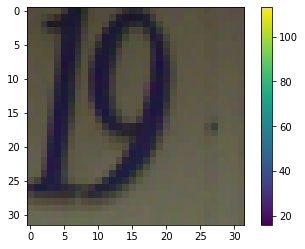

In [6]:
#Confirm the image is in the right format
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#set the class names
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
num_classes = len(class_names)

#unique confirms the number of classes
#np.unique(train_labels)

In [8]:
#confirm images are in correct format
train_images.shape

(73257, 32, 32, 3)

In [9]:
# Scale value to range 0 to 1 
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [11]:
#bn_axis = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes+1))#had to add 1 to num_classes to make it work
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [18]:
hist = model.fit(train_images, train_labels, batch_size=128 ,epochs=1, validation_data=(test_images,test_labels))

Train on 73257 samples, validate on 26032 samples
Epoch 1/1
73257/73257 [==============================] - 168s 2ms/step - loss: 1.1788 - accuracy: 0.6063 - val_loss: 0.4941 - val_accuracy: 0.8524


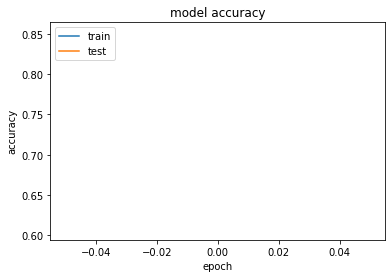

In [19]:
# summarize history for accuracy
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

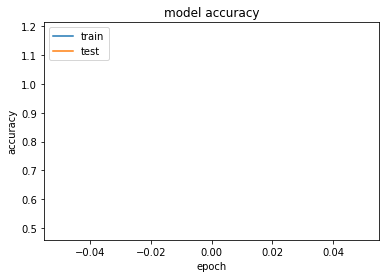

In [20]:
# summarize history for loss value
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
#calculate the test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

26032/26032 [==============================] - 31s 1ms/step
Test accuracy: 0.8523740172386169


In [22]:
#get the prediction for all test images
predictions = model.predict(test_images)

[2.9521874e-07 9.2778325e-02 8.3069212e-04 3.7788446e-03 8.6222398e-01
 9.0900267e-04 6.2284027e-03 1.7418595e-04 2.6082362e-03 6.0921456e-03
 2.4375847e-02]
Prediction Class is 4 with 0.86 probability
Actual Class Label is 4


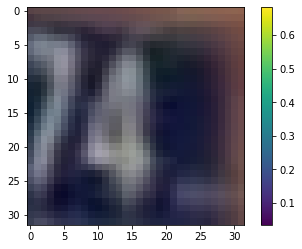

In [50]:
#review for a single test example
print (predictions[100])
print ('Prediction Class is %i with %0.2f probability' 
       % (np.argmax(predictions[100]),  predictions[100][np.argmax(predictions[100])])) 
print ("Actual Class Label is %i" % test_labels[100])

#print the image
plt.figure()
plt.imshow(test_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

### SVM Method

Struggling to run on more that a few thousand images!

In [13]:
from sklearn import svm


In [14]:
#reshape the training data so it is suitable for SVM
x_train_svm=train_images.reshape((len(train_images)),-1) #for svm
x_test_svm=test_images.reshape((len(test_images)),-1)
print (x_train_svm.shape)
print (x_test_svm.shape)


(73257, 3072)
(26032, 3072)


In [15]:
x_train_svm[0:5000,:].shape

(5000, 3072)

In [16]:

clf = svm.SVC(gamma='scale')
#clf.fit(x_train_svm,train_labels)
clf.fit(x_train_svm[0:5000],train_labels[0:5000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
clf.predict(x_test_svm[0:5000])

array([1, 2, 1, ..., 2, 1, 9], dtype=uint8)

In [ ]:
print(clf.score(x_test_svm[0:5000],test_labels[0:5000]))